<a href="https://colab.research.google.com/github/JSJeong-me/GPT-Agent/blob/main/autogen/01-Messages_0311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "autogen-ext[openai]"

In [ ]:
!!pip install autogen-agentchat

In [2]:
from google.colab import userdata
import openai
import os

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
openai.api_key  = os.environ["OPENAI_API_KEY"]

In [3]:
from autogen_ext.models.openai import OpenAIChatCompletionClient

openai_model_client = OpenAIChatCompletionClient(
    model="gpt-4o-2024-08-06",
    # api_key="sk-...", # Optional if you have an OPENAI_API_KEY environment variable set.
)

In [4]:
from autogen_core.models import UserMessage

result = await openai_model_client.create([UserMessage(content="What is the capital of France?", source="user")])
print(result)

finish_reason='stop' content='The capital of France is Paris.' usage=RequestUsage(prompt_tokens=15, completion_tokens=8) cached=False logprobs=None thought=None


Agent-Agent Messages
AgentChat supports many message types for agent-to-agent communication. They belong to the union type ChatMessage. This message type allows both text and multimodal communication and subsumes other message types, such as TextMessage or MultiModalMessage.

In [7]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")

In [8]:
text_message

TextMessage(source='User', models_usage=None, metadata={}, content='Hello, world!', type='TextMessage')


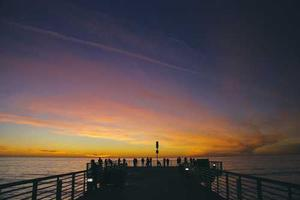

In [9]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
img

In [10]:
multi_modal_message

MultiModalMessage(source='User', models_usage=None, metadata={}, content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x783447133090>], type='MultiModalMessage')